# Inicio

In [149]:
import re
import pandas as pd

In [150]:
texto = "esto eZ un ####hasthag"

In [151]:
re.sub('[^#]', "", texto) # Caso de A-Z

'####'

In [152]:
from sklearn.feature_extraction.text import CountVectorizer

Creamos el corpus

In [153]:
s1 = "me gustan los perros"
s2 = "hay perros y perros"
s3 = "hay muchas razas de perros"

In [154]:
corpus = [s1, s2, s3]

In [155]:
corpus

['me gustan los perros', 'hay perros y perros', 'hay muchas razas de perros']

Instanciamos

In [156]:
vec = CountVectorizer()

Fit_transform

In [157]:
X = vec.fit_transform(corpus)

In [158]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 11 stored elements and shape (3, 8)>

In [159]:
X.toarray()

array([[0, 1, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 2, 0],
       [1, 0, 1, 0, 0, 1, 1, 1]])

In [160]:
print(vec.get_feature_names_out())

['de' 'gustan' 'hay' 'los' 'me' 'muchas' 'perros' 'razas']


In [161]:
matrix = pd.DataFrame(X.toarray(), columns = vec.get_feature_names_out())

In [162]:
matrix

,de,gustan,hay,los,me,muchas,perros,razas
0,0,1,0,1,1,0,1,0
1,0,0,1,0,0,0,2,0
2,1,0,1,0,0,1,1,1


# Ejemplo practico

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

la novedad:

In [164]:
import nltk

In [165]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zubel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [166]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zubel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\zubel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [167]:
df = pd.read_json('C:/GitHub/fz-dataworks/Python/Procesamiento Lenguaje Natural/Sarcasm_Headlines_Dataset(json).json', lines = True)

In [168]:
df

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


# Exploramos

In [169]:
df.shape

(28619, 3)

In [170]:
index_random = np.random.randint(0, df.shape[0])

In [171]:
titular = df.iloc[index_random]

In [172]:
titular

is_sarcastic                                                    1
headline        fcc to fine americans who don't keep up with t...
article_link    https://entertainment.theonion.com/fcc-to-fine...
Name: 7046, dtype: object

In [173]:
type(titular.headline)

str

Tokenización

In [174]:
titular_st = nltk.sent_tokenize(titular.headline) # diferentes oraciones

In [175]:
titular_st

["fcc to fine americans who don't keep up with tv shows"]

In [176]:
titular_word = nltk.word_tokenize(titular.headline)

In [177]:
titular_word

['fcc',
 'to',
 'fine',
 'americans',
 'who',
 'do',
 "n't",
 'keep',
 'up',
 'with',
 'tv',
 'shows']

In [178]:
stopwords = nltk.corpus.stopwords.words('english')

In [179]:
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

Una vez que tenemos las PALABRAS TOKENIZADAS (separadas), eliminamos todas las palabras que pertenezcan a este conjunto de palabras llamado "stopwords". No le sirven a nuestro analisis.

In [180]:
titular_sw = [word for word in titular_word if word not in stopwords]

In [181]:
titular_sw

['fcc', 'fine', 'americans', "n't", 'keep', 'tv', 'shows']

In [182]:
freq = nltk.FreqDist(titular_sw)

In [183]:
freq

FreqDist({'fcc': 1, 'fine': 1, 'americans': 1, "n't": 1, 'keep': 1, 'tv': 1, 'shows': 1})

# Analizamos DF no-sarcastico

In [184]:
df_no_sarcastico = df[df.is_sarcastic == 0]

In [185]:
df_no_sarcastico

,is_sarcastic,headline,article_link
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...
...,...,...,...
28607,0,what our grieving family needs from loved ones...,https://www.huffingtonpost.com/entry/what-our-...
28608,0,stephen colbert attempts to list everything tr...,https://www.huffingtonpost.com/entry/stephen-c...
28609,0,bakery owner vows to stop making wedding cakes...,https://www.huffingtonpost.com/entry/jack-phil...
28613,0,how san antonio's dominant defense is fueling ...,https://www.huffingtonpost.com/entry/san-anton...


In [186]:
df_no_sarcastico.shape[0]

14985

In [187]:
todos_los_titulares_no_sarcasticos = []
for i in range(df_no_sarcastico.shape[0]):
  titular = df_no_sarcastico.iloc[i].headline
  titular = nltk.tokenize.RegexpTokenizer('[\w]+').tokenize(titular)
  titular = [word for word in titular if word not in stopwords]

  todos_los_titulares_no_sarcasticos.append(titular)

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\zubel\AppData\Local\Temp\ipykernel_5028\1933403348.py:4: SyntaxWarning: invalid escape sequence '\w'
  titular = nltk.tokenize.RegexpTokenizer('[\w]+').tokenize(titular)


In [188]:
todos_los_titulares_no_sarcasticos

[['dem',
  'rep',
  'totally',
  'nails',
  'congress',
  'falling',
  'short',
  'gender',
  'racial',
  'equality'],
 ['eat', 'veggies', '9', 'deliciously', 'different', 'recipes'],
 ['white', 'inheritance'],
 ['5', 'ways', 'file', 'taxes', 'less', 'stress'],
 ['lots', 'parents', 'know', 'scenario'],
 ['lesbian', 'considered', 'father', 'indiana', 'amazing', 'one'],
 ['amanda', 'peet', 'told', 'daughter', 'sex', 'special', 'hug'],
 ['know', 'regarding', 'current', 'treatments', 'ebola'],
 ['chris',
  'christie',
  'suggests',
  'hillary',
  'clinton',
  'blame',
  'boko',
  'haram',
  'kidnapping',
  'hundreds',
  'schoolgirls'],
 ['uber',
  'ceo',
  'travis',
  'kalanick',
  'stepping',
  'trump',
  'economic',
  'advisory',
  'council'],
 ['leave', 'person', 'disabilities', 'behind'],
 ['lin',
  'manuel',
  'miranda',
  'would',
  'like',
  'remind',
  'put',
  'phone',
  'away'],
 ['60',
  'journalists',
  'killed',
  '2014',
  'targeting',
  'international',
  'press',
  'rises']

In [189]:
import itertools

In [190]:
todos_los_titulares_no_sarcasticos = list(itertools.chain(*todos_los_titulares_no_sarcasticos))

In [191]:
todos_los_titulares_no_sarcasticos

['dem',
 'rep',
 'totally',
 'nails',
 'congress',
 'falling',
 'short',
 'gender',
 'racial',
 'equality',
 'eat',
 'veggies',
 '9',
 'deliciously',
 'different',
 'recipes',
 'white',
 'inheritance',
 '5',
 'ways',
 'file',
 'taxes',
 'less',
 'stress',
 'lots',
 'parents',
 'know',
 'scenario',
 'lesbian',
 'considered',
 'father',
 'indiana',
 'amazing',
 'one',
 'amanda',
 'peet',
 'told',
 'daughter',
 'sex',
 'special',
 'hug',
 'know',
 'regarding',
 'current',
 'treatments',
 'ebola',
 'chris',
 'christie',
 'suggests',
 'hillary',
 'clinton',
 'blame',
 'boko',
 'haram',
 'kidnapping',
 'hundreds',
 'schoolgirls',
 'uber',
 'ceo',
 'travis',
 'kalanick',
 'stepping',
 'trump',
 'economic',
 'advisory',
 'council',
 'leave',
 'person',
 'disabilities',
 'behind',
 'lin',
 'manuel',
 'miranda',
 'would',
 'like',
 'remind',
 'put',
 'phone',
 'away',
 '60',
 'journalists',
 'killed',
 '2014',
 'targeting',
 'international',
 'press',
 'rises',
 'live',
 '110',
 'cat',
 'scared'

In [192]:
freq_no_sarcasmo = nltk.FreqDist(todos_los_titulares_no_sarcasticos)

In [193]:
type(freq_no_sarcasmo)

nltk.probability.FreqDist

In [194]:
df_no_sarcasmo = pd.DataFrame(list(freq_no_sarcasmo.items()), columns = ['Words', 'Freq'])

In [195]:
df_no_sarcasmo.sort_values('Freq', ascending = False, inplace = True)

In [196]:
df_no_sarcasmo

,Words,Freq
61,trump,1446
99,new,680
225,donald,458
562,says,349
897,women,317
...,...,...
17235,redskins,1
17236,redstate,1
17237,leon,1
7755,kemp,1


In [197]:
df_no_sarcasmo = df_no_sarcasmo.reset_index()

In [198]:
df_no_sarcasmo

,index,Words,Freq
0,61,trump,1446
1,99,new,680
2,225,donald,458
3,562,says,349
4,897,women,317
...,...,...,...
17331,17235,redskins,1
17332,17236,redstate,1
17333,17237,leon,1
17334,7755,kemp,1


In [199]:
df_no_sarcasmo.head(100)

,index,Words,Freq
0,61,trump,1446
1,99,new,680
2,225,donald,458
3,562,says,349
4,897,women,317
...,...,...,...
95,108,baby,95
96,38,sex,95
97,1573,good,93
98,1000,john,93


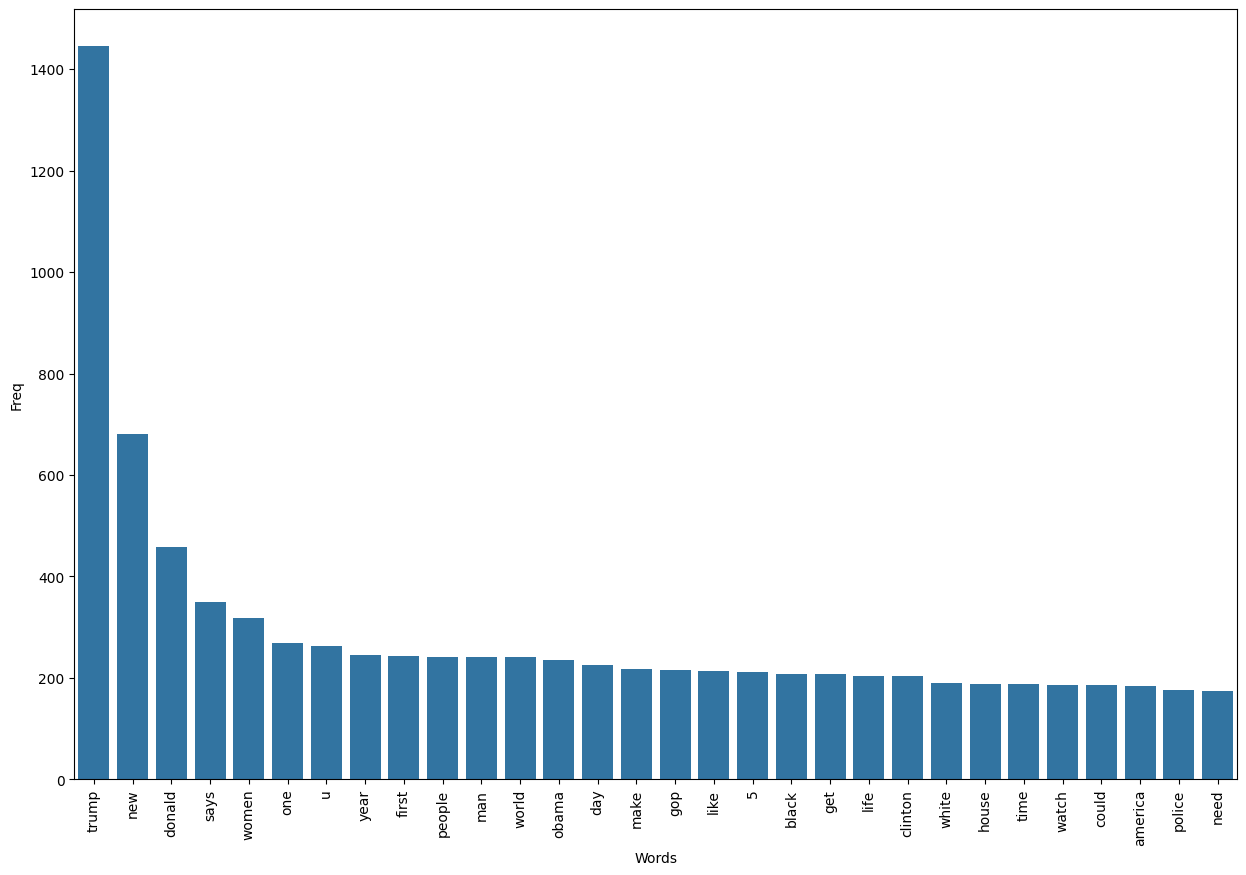

In [200]:
plt.figure(figsize = (15,10))
plot = sns.barplot(x = df_no_sarcasmo.iloc[:30].Words, y =df_no_sarcasmo.iloc[:30].Freq)
for f in plot.get_xticklabels():
  f.set_rotation(90)

plt.show()

# Df Sarcasmo

<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\w'
C:\Users\zubel\AppData\Local\Temp\ipykernel_5028\895951861.py:6: SyntaxWarning: invalid escape sequence '\w'
  titular = nltk.tokenize.RegexpTokenizer('[\w]+').tokenize(titular)


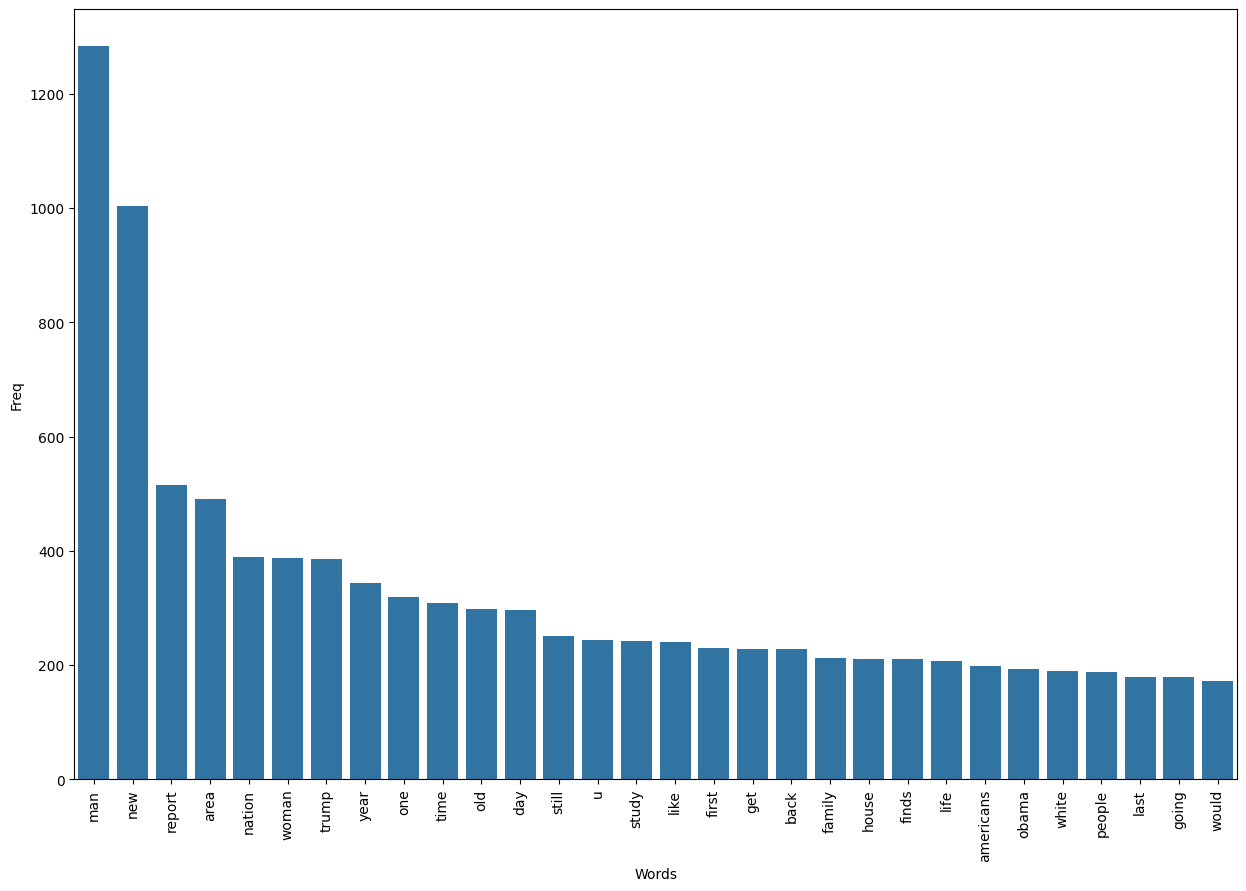

In [201]:
df_sarcasmo = df[df.is_sarcastic == 1]
todos_titulares_sarcasmo = []

for i in range(df_sarcasmo.shape[0]):
  titular = df_sarcasmo.iloc[i].headline
  titular = nltk.tokenize.RegexpTokenizer('[\w]+').tokenize(titular)
  titular = [word for word in titular if word not in stopwords]

  todos_titulares_sarcasmo.append(titular)

todos_titulares_sarcasmo = list(itertools.chain(*todos_titulares_sarcasmo))

freq_sarcasmo = nltk.FreqDist(todos_titulares_sarcasmo)
df_sarcasmo = pd.DataFrame(list(freq_sarcasmo.items()), columns = ['Words', 'Freq'])
df_sarcasmo.sort_values('Freq', ascending = False, inplace = True)
df_sarcasmo = df_sarcasmo.reset_index()

plt.figure(figsize = (15,10))
plot = sns.barplot(x = df_sarcasmo.iloc[:30].Words, y = df_sarcasmo.iloc[:30].Freq)
for f in plot.get_xticklabels():
  f.set_rotation(90)

plt.show()

# Stemming

In [202]:
dataset = pd.read_json('C:/GitHub/fz-dataworks/Python/Procesamiento Lenguaje Natural/Sarcasm_Headlines_Dataset(json).json', lines = True)

In [203]:
dataset

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [204]:
dataset = pd.concat([dataset.headline, dataset.is_sarcastic], axis = 1)

In [205]:
dataset

,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep. totally nails why congress is falling...,0
2,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting t...,1
4,mother comes pretty close to using word 'strea...,1
...,...,...
28614,jews to celebrate rosh hashasha or something,1
28615,internal affairs investigator disappointed con...,1
28616,the most beautiful acceptance speech this week...,0
28617,mars probe destroyed by orbiting spielberg-gat...,1


In [206]:
import re
from nltk.stem import PorterStemmer

In [207]:
stemmer = PorterStemmer()

In [208]:
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

Normalización

In [209]:
titular_list = []
for titular in dataset.headline:
  titular = re.sub("[^a-zA-Z]", " ", str(titular))
  titular = titular.lower()
  titular = nltk.word_tokenize(titular)
  titular = [palabra for palabra in titular if len(palabra) >= 3]
  titular = [palabra for palabra in titular if not palabra in stopwords]
  titular = " ".join(titular)
  titular_list.append(titular)

In [210]:
titular_list

['thirtysomething scientists unveil doomsday clock hair loss',
 'dem rep totally nails congress falling short gender racial equality',
 'eat veggies deliciously different recipes',
 'inclement weather prevents liar getting work',
 'mother comes pretty close using word streaming correctly',
 'white inheritance',
 'ways file taxes less stress',
 'richard branson global warming donation nearly much cost failed balloon trips',
 'shadow government getting large meet marriott conference room',
 'lots parents know scenario',
 'lesbian considered father indiana amazing one',
 'amanda peet told daughter sex special hug',
 'know regarding current treatments ebola',
 'chris christie suggests hillary clinton blame boko haram kidnapping hundreds schoolgirls',
 'ford develops new suv runs purely gasoline',
 'uber ceo travis kalanick stepping trump economic advisory council',
 'area boy enters jumping touching tops doorways phase',
 'area man traveling gurney',
 'leave person disabilities behind',
 '

In [211]:
dataset['titular_stem'] = titular_list

In [212]:
dataset

,headline,is_sarcastic,titular_stem
0,thirtysomething scientists unveil doomsday clo...,1,thirtysomething scientists unveil doomsday clo...
1,dem rep. totally nails why congress is falling...,0,dem rep totally nails congress falling short g...
2,eat your veggies: 9 deliciously different recipes,0,eat veggies deliciously different recipes
3,inclement weather prevents liar from getting t...,1,inclement weather prevents liar getting work
4,mother comes pretty close to using word 'strea...,1,mother comes pretty close using word streaming...
...,...,...,...
28614,jews to celebrate rosh hashasha or something,1,jews celebrate rosh hashasha something
28615,internal affairs investigator disappointed con...,1,internal affairs investigator disappointed con...
28616,the most beautiful acceptance speech this week...,0,beautiful acceptance speech week came queer ko...
28617,mars probe destroyed by orbiting spielberg-gat...,1,mars probe destroyed orbiting spielberg gates ...


In [213]:
dataset_stem = pd.concat([dataset.titular_stem, dataset.is_sarcastic], axis = 1)

In [214]:
dataset_stem

,titular_stem,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep totally nails congress falling short g...,0
2,eat veggies deliciously different recipes,0
3,inclement weather prevents liar getting work,1
4,mother comes pretty close using word streaming...,1
...,...,...
28614,jews celebrate rosh hashasha something,1
28615,internal affairs investigator disappointed con...,1
28616,beautiful acceptance speech week came queer ko...,0
28617,mars probe destroyed orbiting spielberg gates ...,1


# Lemmatizar

In [215]:
from nltk.stem import WordNetLemmatizer
word_lem = WordNetLemmatizer()

In [216]:
frase = dataset_stem.titular_stem[40]

In [217]:
frase

'best clothes man child life'

In [218]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zubel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [219]:
word_lem.lemmatize(frase) #como son palabras muy especificas, por eso no hace nada

'best clothes man child life'

In [220]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zubel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [221]:
from nltk.corpus import wordnet

Esta forma de hacerlo esta en la pagina de wordnet, fue practicamente copiar y pegar. Es para decirle si es ADJ, NOUN, VERB, ADV.

In [222]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper() #esto nos devuelve algo, queremos usar el de la posicion 0 y 1
    # word, posicion, number, lemma. 0, 1 y 0.
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [223]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

Esto se hace tokenizando y lematizando y guardando todo en una lista, al igual que antes

In [224]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\zubel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [225]:
lista_frases_tok_lem = []
for titular in dataset.titular_stem:
  titular_tok = nltk.word_tokenize(titular)
  frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in titular_tok] #así aparece en la documentación en Wordnet
  tipo_palabra = [get_wordnet_pos(w) for w in titular_tok]
  frase_lemma = " ".join(frase_lemma)
  lista_frases_tok_lem.append(frase_lemma)

In [226]:
dataset["titular_lemm"] = titular_list



Ahora vemos nuestro dataset lemm



In [227]:
dataset_lemm = pd.concat([dataset.titular_lemm,dataset.is_sarcastic],axis=1)
dataset_lemm.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
dataset_lemm.head()

,titular_lemm,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep totally nails congress falling short g...,0
2,eat veggies deliciously different recipes,0
3,inclement weather prevents liar getting work,1
4,mother comes pretty close using word streaming...,1


Pasamos todos los titulos a una lista

In [228]:
lista_titulos = list(dataset_lemm['titular_lemm'].values)

In [229]:
is_sarcas = dataset_lemm['is_sarcastic'].values

In [230]:
lista_titulos

['thirtysomething scientists unveil doomsday clock hair loss',
 'dem rep totally nails congress falling short gender racial equality',
 'eat veggies deliciously different recipes',
 'inclement weather prevents liar getting work',
 'mother comes pretty close using word streaming correctly',
 'white inheritance',
 'ways file taxes less stress',
 'richard branson global warming donation nearly much cost failed balloon trips',
 'shadow government getting large meet marriott conference room',
 'lots parents know scenario',
 'lesbian considered father indiana amazing one',
 'amanda peet told daughter sex special hug',
 'know regarding current treatments ebola',
 'chris christie suggests hillary clinton blame boko haram kidnapping hundreds schoolgirls',
 'ford develops new suv runs purely gasoline',
 'uber ceo travis kalanick stepping trump economic advisory council',
 'area boy enters jumping touching tops doorways phase',
 'area man traveling gurney',
 'leave person disabilities behind',
 '

Ahora extraemos 1000 palabras y las guardamos en una lista

In [231]:
from sklearn.feature_extraction.text import CountVectorizer

In [232]:
max_features = 1000

In [233]:
coun_vec = CountVectorizer(max_features = max_features)

In [234]:
matriz_titulos = coun_vec.fit_transform(lista_titulos)

In [235]:
all_words = coun_vec.get_feature_names_out()

In [236]:
len(all_words)

1000

In [237]:
all_words

array(['abortion', 'abuse', 'accidentally', 'accused', 'across', 'act',
       'action', 'actor', 'actually', 'address', 'adds', 'administration',
       'admits', 'adorable', 'advice', 'age', 'ago', 'ahead', 'air',
       'airport', 'album', 'allegations', 'almost', 'already', 'also',
       'always', 'amazing', 'amazon', 'america', 'american', 'americans',
       'amid', 'anniversary', 'announce', 'announces', 'another', 'anti',
       'anyone', 'anything', 'apartment', 'apologizes', 'apparently',
       'apple', 'area', 'around', 'arrested', 'art', 'artist', 'ask',
       'asking', 'asks', 'assault', 'attack', 'attacks', 'attempt',
       'audience', 'avoid', 'award', 'awards', 'away', 'baby', 'back',
       'bad', 'ban', 'band', 'bank', 'bar', 'bathroom', 'battle', 'bear',
       'beautiful', 'beauty', 'become', 'begins', 'behind', 'believe',
       'ben', 'bernie', 'best', 'better', 'biden', 'big', 'biggest',
       'bill', 'billion', 'birth', 'birthday', 'black', 'blood', 'board'

Separamos en X e Y, siendo Y la variable dependiente que vamos a clasificar.

In [238]:
X = matriz_titulos.toarray()
y = is_sarcas

In [239]:
from sklearn.model_selection import train_test_split

stratify = y lo utilizamos para que queden balanceados en 0 y 1.

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [241]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

El accuracy del modelo es bajo, pero solo es una muestra del potencial que tiene.

In [242]:
rf = RandomForestClassifier(n_estimators = 50, random_state=42)
rf.fit(X_train, y_train)
print("accuracy: ", rf.score(X_test, y_test))

accuracy:  0.71680642907058
